In [3]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, \
    roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [5]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
X_train.shape

(50000, 32, 32, 3)

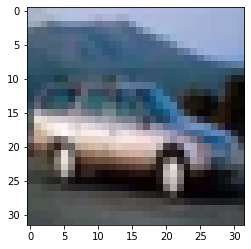

In [7]:
plt.imshow(X_train[4])

In [8]:
car_truck_index = np.where((y_train == 1) | (y_train == 9))[0]

In [9]:
Xtrain = X_train[car_truck_index]
ytrain = y_train[car_truck_index]

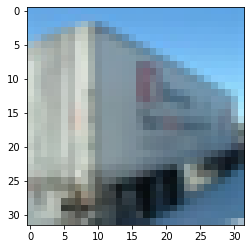

In [10]:
plt.imshow(Xtrain[5])

In [11]:
car_truck_index_test = np.where((y_test == 1) | (y_test == 9))[0]

In [12]:
Xtest = X_test[car_truck_index_test]
ytest = y_test[car_truck_index_test]

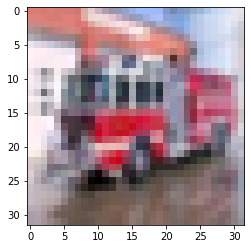

In [13]:
plt.imshow(Xtest[8])

In [14]:
Xtrain = Xtrain.reshape(10000,-1)
Xtest = Xtest.reshape(2000,-1)

In [15]:
ytrain = ytrain.reshape(10000,)
ytest = ytest.reshape(2000,)

In [16]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [27]:
SVCmod = SVC(kernel = 'rbf')

In [28]:
SVCmod.fit(Xtrain, ytrain)

SVC()

In [29]:
preds = SVCmod.predict(Xtest)

In [30]:
conf_mat = confusion_matrix(ytest, preds)
tn, fp, fn, tp = conf_mat.ravel()
print(conf_mat)
print('Train Recall: ', recall_score(ytest, preds))
print('Train Precision: ', precision_score(ytest, preds))

[[790 210]
 [218 782]]
Train Recall:  0.79
Train Precision:  0.7837301587301587


In [31]:
forest = RandomForestClassifier()
forest.fit(Xtrain, ytrain)

RandomForestClassifier()

In [32]:
preds = forest.predict(Xtest)

In [33]:
conf_mat = confusion_matrix(ytest, preds)
tn, fp, fn, tp = conf_mat.ravel()
print(conf_mat)
print('Recall: ', recall_score(ytest, preds))
print('Precision: ', precision_score(ytest, preds))

[[761 239]
 [259 741]]
Recall:  0.761
Precision:  0.746078431372549


In [34]:
boost = GradientBoostingClassifier()
boost.fit(Xtrain, ytrain)

GradientBoostingClassifier()

In [38]:
preds = boost.predict(Xtest)

In [36]:
conf_mat = confusion_matrix(ytest, preds)
tn, fp, fn, tp = conf_mat.ravel()
print(conf_mat)
print('Recall: ', recall_score(ytest, preds))
print('Precision: ', precision_score(ytest, preds))

[[740 260]
 [240 760]]
Recall:  0.74
Precision:  0.7551020408163265


In [10]:
Clist = [.5, 1.5]
kernellist = ['rbf', 'sigmoid']
SVCCV = SVC()
gridSVC = GridSearchCV(SVCCV, param_grid = {'C':Clist, 'kernel':kernellist}, scoring = 'roc_auc')
gridSVC.fit(Xtrain, ytrain)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 1.5], 'kernel': ['rbf', 'sigmoid']},
             scoring='roc_auc')

In [11]:
gridSVC.best_params_

{'C': 1.5, 'kernel': 'rbf'}

In [13]:
pd.DataFrame(gridSVC.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,176.679098,0.857894,42.987525,0.210277,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",0.858472,0.830875,0.843268,0.852232,0.848668,0.846703,0.009330,2
1,137.867666,1.061698,34.338784,0.219727,0.5,sigmoid,"{'C': 0.5, 'kernel': 'sigmoid'}",0.413543,0.413461,0.448463,0.434146,0.436056,0.429134,0.013677,3
2,169.393266,0.868206,41.693803,0.187254,1.5,rbf,"{'C': 1.5, 'kernel': 'rbf'}",0.882111,0.855600,0.873336,0.876420,0.874553,0.872404,0.008924,1
3,132.485204,3.042821,33.362680,0.230459,1.5,sigmoid,"{'C': 1.5, 'kernel': 'sigmoid'}",0.413276,0.413182,0.448132,0.433904,0.435729,0.428845,0.013658,4


In [39]:
preds = gridSVC.predict(Xtest)

In [40]:
conf_mat = confusion_matrix(ytest, preds)
tn, fp, fn, tp = conf_mat.ravel()
print(conf_mat)
print('Recall: ', recall_score(ytest, preds))
print('Precision: ', precision_score(ytest, preds))

[[797 203]
 [216 784]]
Recall:  0.797
Precision:  0.786771964461994


0.7905